# Table of Contents
 <p>

In [1]:
import os
os.chdir('../../')

In [2]:
import matplotlib.pyplot as plt

In [3]:
from spikelearn.models.shuffle_decoding import shuffle_val_predict
from spikelearn.data import io, select, to_feature_array, remove_baseline

In [4]:
r = io.load('DRRD 8', 'medium_smoothed')

In [5]:
df = to_feature_array(select(r, _min_duration=1.5), False)

In [6]:
df1, df2 = df.loc[:50], df.loc[50:100]

In [7]:
from sklearn.linear_model import LogisticRegression

In [10]:
%load_ext autoreload
%autoreload 2

In [72]:
data_ = select( io.load('DRRD 8', 'medium_smoothed'),
                _min_duration=1.5, is_selected=True ).reset_index()

# Divide dataset into parts
## Define how the separation will happen
trials = data_.trial.unique()
slice_bounds = trials[::60]
n_slices = len(slice_bounds) - 1
## Enforce separation
dfs = [to_feature_array( select( data_,
                                _min_trial = slice_bounds[i],
                                _max_trial = slice_bounds[i+1]
                                ).set_index(['trial','unit']),
                        False, 'cropped') for i in range(n_slices)]

In [79]:
clf=LogisticRegression()

In [76]:
import numpy as np

In [77]:
names=np.arange(len(dfs))

In [80]:
one_p, one_w, one_s = shuffle_val_predict( clf, [df.reset_index() for df in dfs], names,
                                 X=dfs[0].columns, y='time', group='trial',
                                 cv='sh', n_splits = 20)

7 [0 1 2 3 4 5 6]
training 0
training 1
training 2
training 3
training 4
training 5
training 6


In [91]:
import seaborn as sns

In [92]:
%matplotlib inline

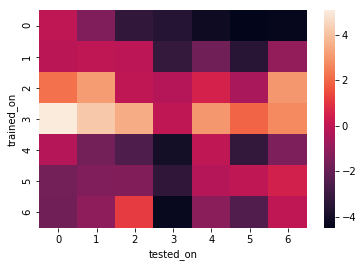

In [94]:
sns.heatmap(one_s.score_max.unstack(-1))

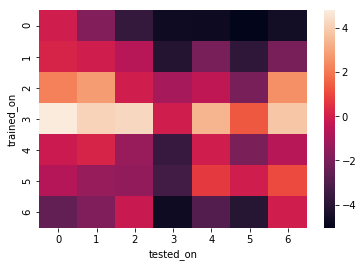

In [95]:
sns.heatmap(one_s.score_mean.unstack(-1))

### Preprocessing

In [10]:
baseline = io.load('DRRD 8', 'epoched_spikes')

In [9]:
remove_baseline(to_feature_array(select(r, _min_duration=1.5), False))

TypeError: remove_baseline() missing 1 required positional argument: 'baseline'

(720, 0)

In [25]:
baseline.duration.max()

7.0820248126983643

In [24]:
baseline.loc[720,0]

time                        [0.154419183731, 0.36478972435, 0.384368658066...
onset                                                                 8184.36
offset                                                                8191.44
duration                                                              7.08202
intertrial_interval                                                  0.858153
is_tired                                                                 True
is_selected                                                              True
comments                                                                     
with_baseline               [-0.463831186295, -0.385679483414, -0.34836483...
baseline                    [-0.463831186295, -0.385679483414, -0.34836483...
time_from_offset            [-6.92760562897, -6.71723508835, -6.6976561546...
normalized_time             [0.0218043833247, 0.0515092412125, 0.054273836...
normalized_without_edges    [0.0554221132145, 0.0583967197031, 0